In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,employer_provided,cleaned_salary,min_salary,max_salary,avg_salary,Founded_int,age
0,VIE AUSTRALIA - Data Scientist IA,$93K - $134K (Glassdoor Est.),Organisation\nNaval Group compte parmi les act...,3.9,Naval Group,Adelaide,5001 to 10000 Employees,1631,Company - Private,Aerospace & Defence,Aerospace & Defence,$2 to $5 billion (USD),0,0,93-134,93,134,113.5,1631.0,389.0
1,Data Scientist,Employer Provided Salary:$85K - $150K,About the Role\nThe Data Scientist works under...,4.0,Telstra,Melbourne,10000+ Employees,1901,Company - Public,Telecommunications Services,Telecommunications,$10+ billion (USD),0,0,85-150,85,150,117.5,1901.0,119.0
2,Data Scientist,Employer Provided Salary:$120K - $150K,Overview\nOur client is seeking experienced Da...,-1.0,Interpro People,Sydney,-1,-1,-1,-1,-1,-1,0,0,120-150,120,150,135.0,1.0,-1.0
3,Data Scientist,$120K - $133K (Glassdoor Est.),Sportsbet's purpose is to bring excitement to ...,3.5,Sportsbet,Melbourne,1001 to 5000 Employees,1993,Company - Private,Gambling & Betting,"Arts, Entertainment & Recreation",Unknown / Non-Applicable,0,0,120-133,120,133,126.5,1993.0,27.0
4,Senior Data Scientist,$127K - $170K (Glassdoor Est.),Join our innovative and collaborative Digital ...,4.1,Macquarie Group,Sydney,10000+ Employees,1969,Company - Public,Investment & Asset Management,Finance,$5 to $10 billion (USD),0,0,127-170,127,170,148.5,1969.0,51.0


In [15]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower() or 'analytics' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'research' in title.lower() or 'researcher' in title.lower():
        return "Researcher"
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    elif 'graduate' in title.lower() or 'grad' in title.lower():
        return 'graduate'
    else:
        return 'na'

In [16]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [18]:
#Variable for type of position
df.job_simp.value_counts()

data scientist    417
analyst           166
mle               122
na                 38
Researcher         32
data engineer       1
Name: job_simp, dtype: int64

In [19]:
#Variable for seniority
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na          518
senior      144
graduate     58
junior       56
Name: seniority, dtype: int64

In [39]:
#Variable for Location
df['Location'] = df.Location.apply(lambda x: x.replace('Westmead', 'Sydney').replace('North Sydney', 'Sydney').replace('Clayton North', 'Melbourne').replace('Waurn Ponds', 'Melbourne').replace('Osterley', 'Newcastle').replace('South Melbourne', 'Melbourne').replace('Bentley', 'Perth').replace('Darlinghurst', 'Sydney').replace('Southport', 'Gold Coast'))
df['Location'] = df.Location.apply(lambda x: x.strip())
df.Location.value_counts()

Sydney        399
Melbourne     233
Brisbane       36
Adelaide       35
Canberra       34
Newcastle      29
Perth           7
Gold Coast      2
Hobart          1
Name: Location, dtype: int64

In [49]:
#Variable for Sector type
df['Sector'] = df.Sector.apply(lambda x: x.replace('Unknown / Non-Applicable', '-1').replace('$500 million to $1 billion (USD)', '-1').replace('$25 to $50 million (USD)', '-1'))
df['Sector'] = df.Sector.apply(lambda x: x.replace('-1', 'undisclosed'))
df.Sector.value_counts()

undisclosed                                    177
Information Technology                         165
Finance                                        158
Education                                       62
Telecommunications                              37
Government & Public Administration              36
Aerospace & Defence                             34
Arts, Entertainment & Recreation                30
Real Estate                                     28
Transportation & Logistics                      28
Human Resources & Staffing                      10
Media & Communication                            4
Management & Consulting                          3
Construction, Repair & Maintenance Services      2
Healthcare                                       1
Retail & Wholesale                               1
Name: Sector, dtype: int64

In [50]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [51]:
#Variable for min and max salary
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
20,1,26,26
28,1,60,60
48,1,226,276
51,1,126,126
78,1,126,126
...,...,...,...
729,1,126,126
734,1,60,60
752,1,126,126
757,1,60,60


In [57]:
#Variable for Company
df['Company'] = df['Company Name']
df.Company.value_counts()

ANZ Banking Group    65
Allianz Australia    56
CSIRO                36
Drumline Digital     32
Sportsbet            30
                     ..
Michael Page          1
BI Group              1
CUBE Global           1
Downer Group          1
Qcells                1
Name: Company, Length: 77, dtype: int64

In [58]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'cleaned_salary', 'min_salary', 'max_salary', 'avg_salary',
       'Founded_int', 'age', 'job_simp', 'seniority', 'Company'],
      dtype='object')

In [64]:
#Variable for type of industry
df['Industry'] = df.Industry.apply(lambda x: x.replace('-1', 'Undisclosed'))
df.Industry.value_counts()

Undisclosed                                    166
Information Technology Support Services         90
Investment & Asset Management                   85
Banking & Lending                               67
Colleges & Universities                         62
Internet & Web Services                         39
National Services & Agencies                    36
Computer Hardware Development                   35
Aerospace & Defence                             34
Gambling & Betting                              30
Telecommunications Services                     29
Real Estate                                     28
Airlines, Airports & Air Transportation         28
HR Consulting                                   10
Cable, Internet & Telephone Providers            8
Accounting & Tax                                 6
Retail & Wholesale                               3
Business Consulting                              3
Management & Consulting                          2
Architectural & Engineering Ser

In [65]:
#Variable for revenue
df['Revenue'] = df.Revenue.apply(lambda x: x.replace('-1', 'Unknown / Non-Applicable'))
df.Revenue.value_counts()

Unknown / Non-Applicable            464
$10+ billion (USD)                  102
$2 to $5 billion (USD)               68
$500 million to $1 billion (USD)     41
$100 to $500 million (USD)           37
$5 to $10 billion (USD)              32
$5 to $25 million (USD)              30
Less than $1 million (USD)            1
$1 to $5 million (USD)                1
Name: Revenue, dtype: int64

<AxesSubplot:>

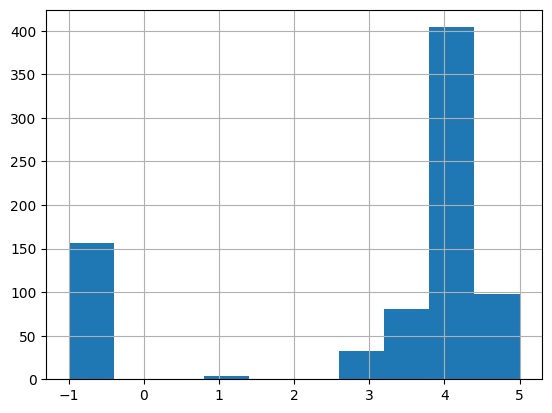

In [66]:
df.Rating.hist()

In [70]:
df.describe()

,Rating,hourly,employer_provided,min_salary,max_salary,avg_salary,Founded_int,age
count,776.000000,776.000000,776.0,776.000000,776.000000,776.000000,716.000000,716.000000
mean,2.973325,0.079897,0.0,106.382732,134.104381,116.384665,1621.301676,68.614525
std,2.031982,0.271308,0.0,29.664431,30.375001,32.800923,721.365208,88.290284
min,-1.000000,0.000000,0.0,26.000000,26.000000,13.000000,1.000000,-1.000000
25%,3.425000,0.000000,0.0,86.000000,113.250000,103.000000,1835.000000,6.000000
50%,3.900000,0.000000,0.0,100.000000,133.000000,114.500000,1949.000000,27.000000
75%,4.100000,0.000000,0.0,126.000000,150.000000,135.000000,1999.000000,119.000000
max,5.000000,1.000000,0.0,226.000000,276.000000,197.500000,2020.000000,389.000000


<AxesSubplot:>

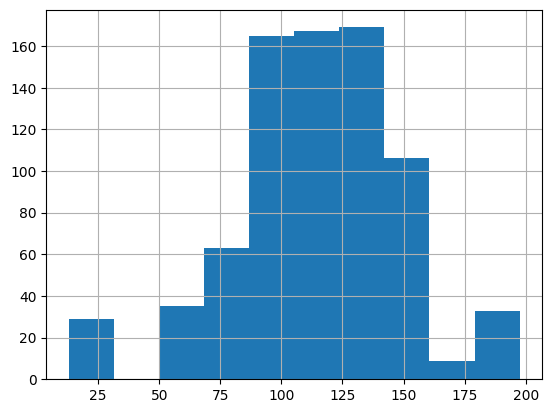

In [67]:
df.avg_salary.hist()

<AxesSubplot:>

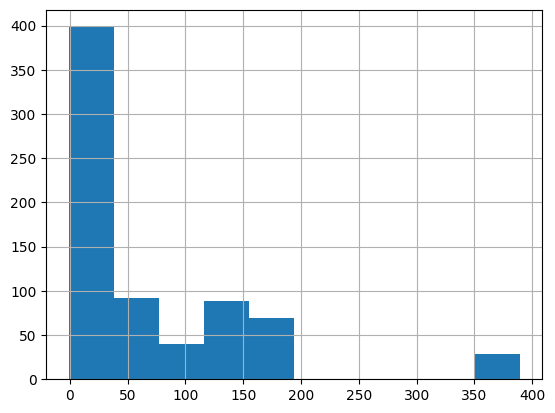

In [68]:
df.age.hist()

<AxesSubplot:>

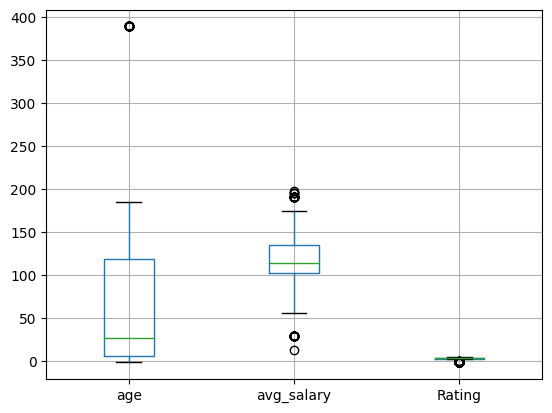

In [69]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

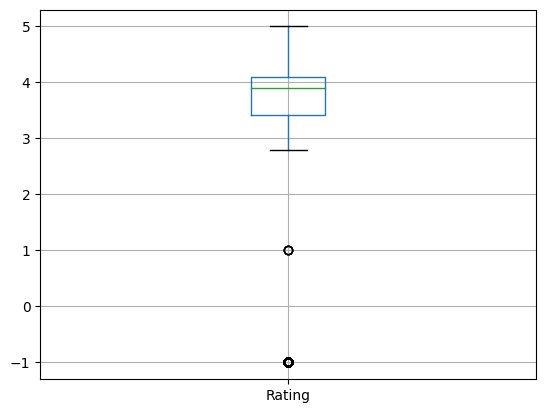

In [71]:
df.boxplot(column = 'Rating')

In [79]:
df[['age','avg_salary','Rating']].corr()

,age,avg_salary,Rating
age,1.000000,-0.184563,0.346576
avg_salary,-0.184563,1.000000,0.143617
Rating,0.346576,0.143617,1.000000


<AxesSubplot:>

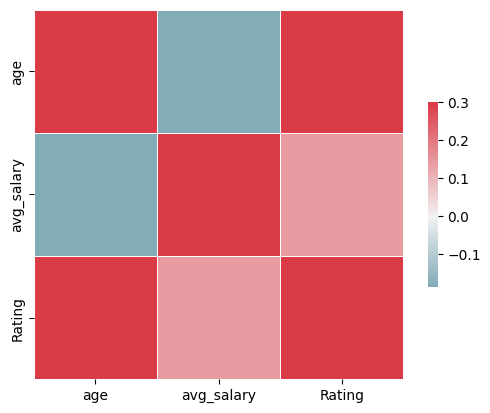

In [83]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [84]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'cleaned_salary', 'min_salary', 'max_salary', 'avg_salary',
       'Founded_int', 'age', 'job_simp', 'seniority', 'Company'],
      dtype='object')

In [89]:
df_cat = df[['Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_simp', 'seniority', 'Company']]

graph for Location: total = 9


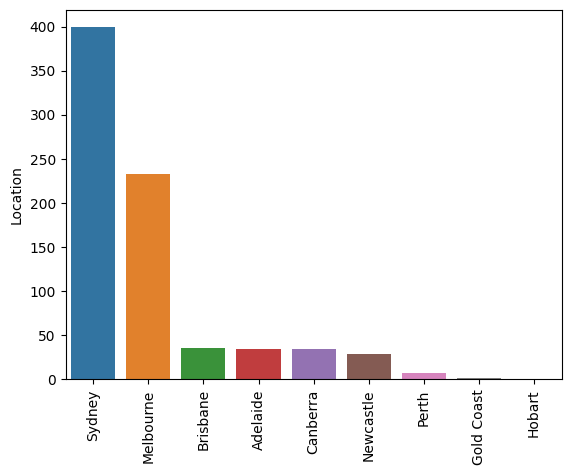

graph for Size: total = 9


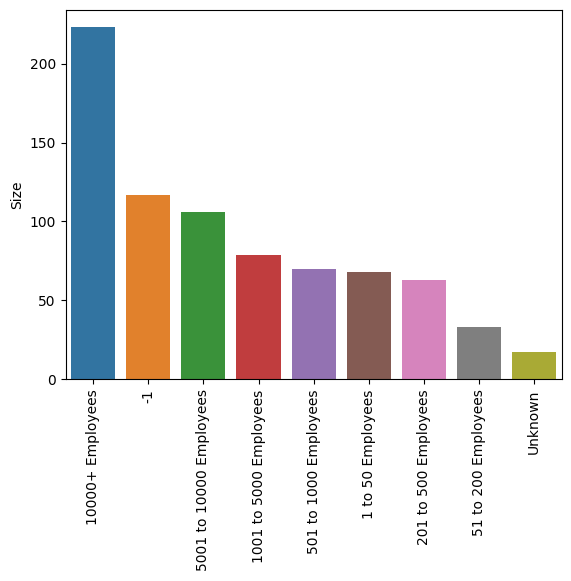

graph for Type of ownership: total = 17


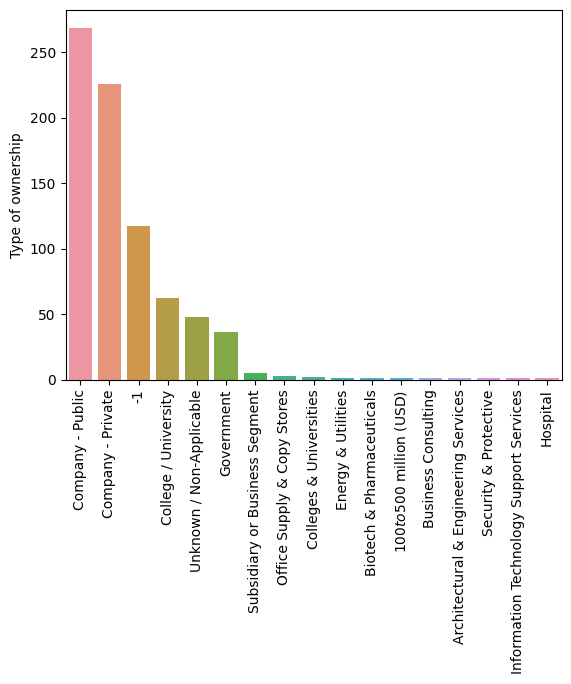

graph for Industry: total = 30


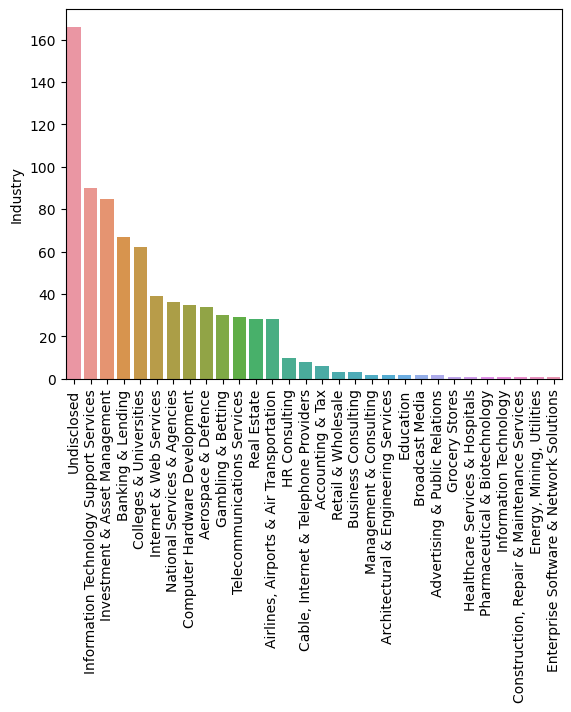

graph for Sector: total = 16


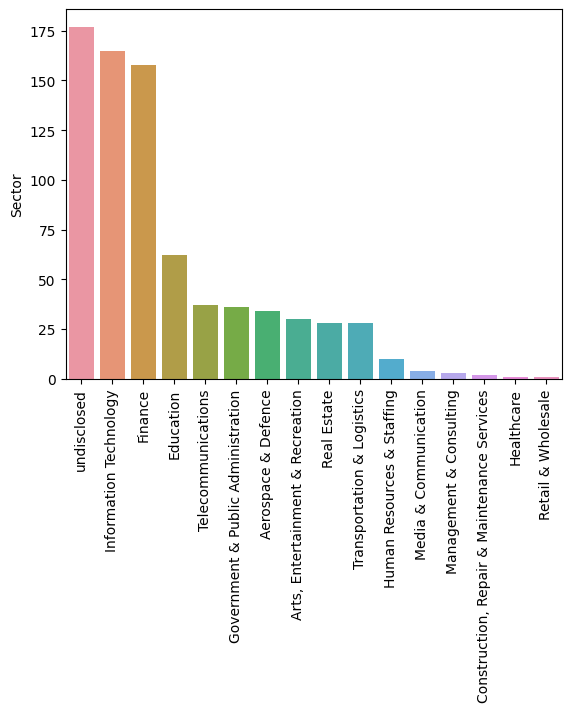

graph for Revenue: total = 9


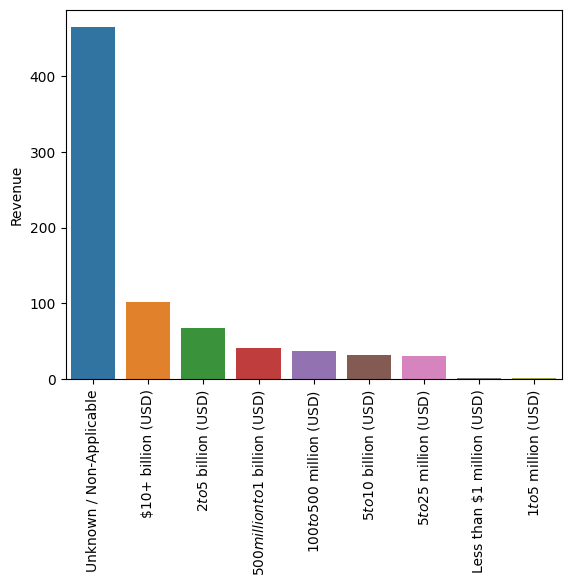

graph for job_simp: total = 6


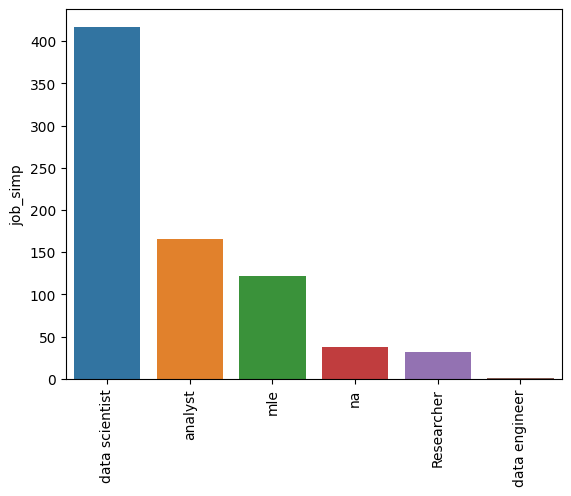

graph for seniority: total = 4


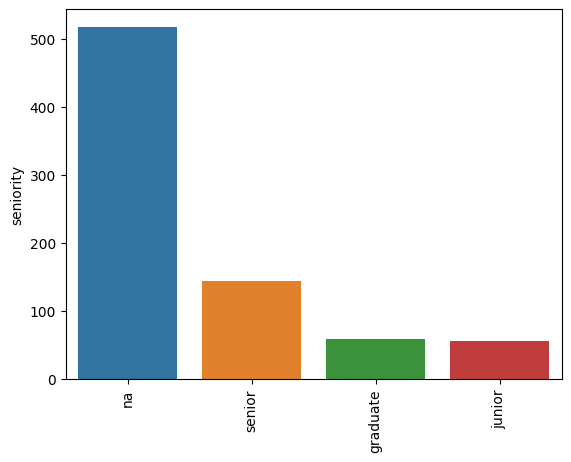

graph for Company: total = 77


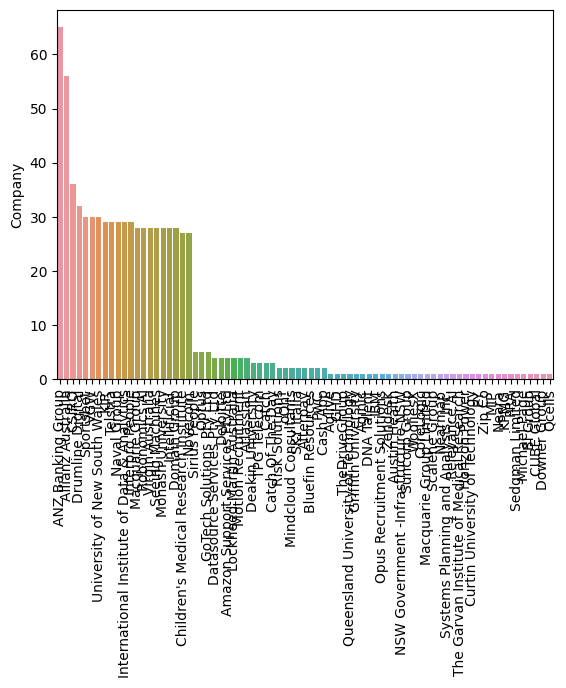

In [90]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Company: total = 20


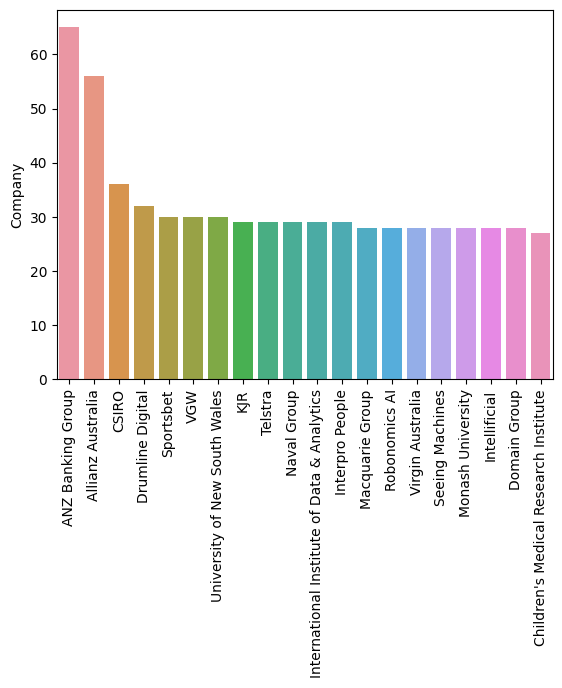

In [92]:
for i in df_cat[['Company']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [94]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
Researcher,85.859375
analyst,103.340361
data engineer,124.000000
data scientist,129.675060
mle,116.631148
na,52.236842


In [104]:
# Hourly wages would inflate annual salary as there is usually compensation for casual / part-time roles
#Next time check omit salary that is paid hourly
pd.pivot_table(df, index = 'seniority', values = 'avg_salary')

,avg_salary
seniority,
graduate,98.655172
junior,139.000000
na,108.621622
senior,142.656250


In [95]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
Researcher     na          85.859375
analyst        graduate    86.500000
               junior      87.500000
               na          71.977273
               senior     138.113636
data engineer  na         124.000000
data scientist graduate   124.500000
               junior     190.500000
               na         120.479560
               senior     147.192857
mle            graduate   109.500000
               na         117.068966
               senior     144.750000
na             na          48.055556
               senior     127.500000

In [96]:
pd.pivot_table(df, index = ['Location','job_simp'], values = 'avg_salary').sort_values('Location', ascending = False)

avg_salary
Location   job_simp                  
Sydney     na              169.000000
           mle             129.805556
           data scientist  137.120141
           analyst         111.381720
           Researcher       80.000000
Perth      na               56.000000
           mle             127.500000
           data scientist  103.000000
           analyst          92.500000
Newcastle  na              128.500000
           data scientist  103.607143
Melbourne  data scientist  118.936620
           na               37.100000
           mle             119.618421
           data engineer   124.000000
           analyst          92.353846
           Researcher       86.000000
Hobart     na               93.500000
Gold Coast analyst         142.500000
           Researcher       99.500000
Canberra   na               85.333333
           mle             123.000000
           data scientist   95.000000
           analyst          71.000000
Brisbane   mle             102.409091
           data scientist  125.500000
           analyst         117.500000
Adelaide   data scientist  113.500000
           mle              99.000000
           analyst          90.500000

In [101]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'Location', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Location,
Sydney,137.120141
Brisbane,125.500000
Melbourne,118.936620
Adelaide,113.500000
Newcastle,103.607143
Perth,103.000000
Canberra,95.000000


In [103]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'cleaned_salary', 'min_salary', 'max_salary', 'avg_salary',
       'Founded_int', 'age', 'job_simp', 'seniority', 'Company'],
      dtype='object')

In [110]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'Type of ownership', 'age', 'Size', 'avg_salary']]

In [111]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 4.4    188.586207
 1.0    135.000000
 4.5    132.366667
 3.9    131.927083
 3.2    124.500000
 3.6    124.444444
 4.6    124.250000
 3.8    124.138298
 3.5    121.530303
 5.0    120.250000
 4.0    115.678571
 2.8    113.833333
 4.7    113.227273
 4.1    108.813725
-1.0    108.291667
 3.7    103.973684
 4.2     96.639344
 3.1     87.413793
 3.0     62.500000
Industry
                                             avg_salary
Industry                                               
Real Estate                                  190.500000
Internet & Web Services                      150.884615
Information Technology                       146.500000
Cable, Internet & Telephone Providers        145.312500
HR Consulting                                140.500000
Management & Consulting                      134.000000
Computer Hardware Development                128.814286
Advertising & Public Relations               128.000000
Gambling & Betting       

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
for i in df_pivots.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()